In [19]:
from collections import Counter
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import string, re, os


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
def lemmetizer_nva(text):
    text = wnl.lemmatize(text, pos='n')
    text = wnl.lemmatize(text, pos='v')
    text = wnl.lemmatize(text, pos='a')
    return text

def replace_punctuation(text):
    punc = list(string.punctuation)
    for i in punc:
        text = text.replace(i, " ")

    return text

def rm_char_number(text):
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove single characters
    text = re.sub(r'\b\w\b', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def clean_user_defined_data(text):
    
    text = text.replace("’", "'")
    text = text.replace("‘", "'")
    text = text.replace("”", '"')
    text = text.replace("“", '"')
    text = text.replace("front-end", "frontend")
    text = text.replace("front end", "frontend")
    text = text.replace("back-end", "backend")
    text = text.replace("back end", "backend")
    text = text.replace("full-stack", "fullstack")
    text = text.replace("full stack", "fullstack")

    return text


wnl = WordNetLemmatizer()
all_jobs = []
dict_keywords = Counter()
base_input = "data/"
base_output = "out/"



with open("job_description.txt", "r") as f:
    src = f.read()
    src = [i for i in src.split("}}}") if i  != ""]
    src = [i.replace("{{{", "") for i in src]

for job in src:
    job = job.lower()
    rm_user_defined_data_job =  clean_user_defined_data(job)
    rm_punctuation_job =        replace_punctuation(rm_user_defined_data_job)
    rm_enter_job =              " ".join([i for i in rm_punctuation_job.split("\n") if i != ""])
    rm_multiple_space_job =     " ".join([i for i in rm_enter_job.split(" ") if i != ""])
    rm_stopwords_job =          " ".join([i for i in rm_multiple_space_job.split(" ") if i not in stopwords.words("english")])
    lemmertize_job =            " ".join([lemmetizer_nva(i) for i in rm_stopwords_job.split(" ")])
    rm_char_number_job =        rm_char_number(lemmertize_job)

    dict_keywords.update(Counter(rm_char_number_job.split(" ")))
    all_jobs.append(rm_char_number_job)

In [38]:
# get all data path

all_data_paths = []

def getAllInputData(input_data_path):
    """
    Get all input data from the input_data_path
    """
    
    for subdir in os.listdir(input_data_path):
        new_path = input_data_path + subdir
        if new_path.endswith(".txt"):
            all_data_paths.append(new_path)
        elif os.path.isdir(new_path):
            getAllInputData(new_path + "/")

    return all_data_paths


getAllInputData(base_input)


['data/C1/article01.txt',
 'data/C1/article02.txt',
 'data/C1/article03.txt',
 'data/C1/article04.txt',
 'data/C1/article05.txt',
 'data/C1/article06.txt',
 'data/C1/article07.txt',
 'data/C1/article08.txt',
 'data/C4/article01.txt',
 'data/C4/article02.txt',
 'data/C4/article03.txt',
 'data/C4/article04.txt',
 'data/C4/article05.txt',
 'data/C4/article06.txt',
 'data/C4/article07.txt',
 'data/C4/article08.txt',
 'data/C7/article01.txt',
 'data/C7/article02.txt',
 'data/C7/article03.txt',
 'data/C7/article04.txt',
 'data/C7/article05.txt',
 'data/C7/article06.txt',
 'data/C7/article07.txt',
 'data/C7/article08.txt']

In [42]:
dict_keywords = Counter()
all_jobs = []

for path in all_data_paths:
    # print(path)
    with open(path, "r") as f:
        data = f.read()
        data = data.lower()

        # print(data)

        rm_user_defined_data_job =  clean_user_defined_data(data)
        rm_punctuation_job =        replace_punctuation(rm_user_defined_data_job)
        rm_enter_job =              " ".join([i for i in rm_punctuation_job.split("\n") if i != ""])
        rm_multiple_space_job =     " ".join([i for i in rm_enter_job.split(" ") if i != ""])
        rm_stopwords_job =          " ".join([i for i in rm_multiple_space_job.split(" ") if i not in stopwords.words("english")])
        lemmertize_job =            " ".join([lemmetizer_nva(i) for i in rm_stopwords_job.split(" ")])
        rm_char_number_job =        rm_char_number(lemmertize_job)

        dict_keywords.update(Counter(rm_char_number_job.split(" ")))
        all_jobs.append(rm_char_number_job)


In [22]:
def filter_dict_keywords_jobs(threshold, keywords, jobs):
    keywords = dict(keywords.most_common(len(keywords)))
    threshold_sum = sum(keywords.values()) * threshold

    ret_dict_keywords = {}
    ret_jobs = []
    ret_sum = 0

    for key, value in keywords.items():
        ret_sum += value
        if ret_sum <= threshold_sum:
            ret_dict_keywords[key] = value
        else:
            break
    
    ret_dict_keywords_key = ret_dict_keywords.keys()

    for job in jobs:
        job = " ".join([i for i in job.split(" ") if i in ret_dict_keywords_key])
        ret_jobs.append(job)

    return ret_dict_keywords, ret_jobs
        
new_dict_keywords, new_all_jobs = filter_dict_keywords_jobs(0.7, dict_keywords, all_jobs)

print(len(dict_keywords))
print(len(new_dict_keywords))

3153
371


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

tfidfvectorizer = TfidfVectorizer(stop_words="english")
X = tfidfvectorizer.fit_transform(new_all_jobs)

TF_IDF_matrix = pd.DataFrame(X.toarray(), columns=tfidfvectorizer.get_feature_names_out())
TF_IDF_matrix

,ability,able,advance,agile,analytical,angular,api,apis,application,apply,...,value,various,version,vue,web,website,work,world,write,year
0,0.044885,0.000000,0.000000,0.052398,0.000000,0.000000,0.060676,0.000000,0.155828,0.000000,...,0.000000,0.0,0.000000,0.000000,0.115107,0.000000,0.000000,0.000000,0.000000,0.035078
1,0.133831,0.000000,0.085372,0.104155,0.000000,0.000000,0.000000,0.055085,0.038719,0.140252,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069727
2,0.060917,0.000000,0.000000,0.035557,0.000000,0.000000,0.000000,0.037611,0.052872,0.000000,...,0.207996,0.0,0.000000,0.000000,0.026037,0.000000,0.020578,0.108893,0.000000,0.119018
3,0.000000,0.072738,0.000000,0.000000,0.000000,0.059488,0.000000,0.000000,0.036980,0.000000,...,0.000000,0.0,0.000000,0.000000,0.036422,0.000000,0.115141,0.000000,0.051619,0.099893
4,0.094971,0.081068,0.000000,0.055435,0.092581,0.000000,0.064192,0.000000,0.041215,0.000000,...,0.162136,0.0,0.000000,0.089261,0.000000,0.000000,0.032082,0.084884,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.038660,0.000000,0.000000,0.045131,0.000000,0.161931,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.026119,0.000000,0.000000,0.090639
134,0.045948,0.000000,0.000000,0.053640,0.089583,0.000000,0.124226,0.056737,0.079760,0.000000,...,0.000000,0.0,0.000000,0.000000,0.157113,0.000000,0.093128,0.000000,0.055667,0.035909
135,0.000000,0.000000,0.000000,0.127176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.093126,0.000000,0.147200,0.000000,0.000000,0.085138
136,0.000000,0.000000,0.084156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.075075,0.0,0.000000,0.000000,0.000000,0.000000,0.089129,0.078609,0.000000,0.034367


[97.80350902939026, 95.01658220584129, 92.88665895547248, 91.42279405308938, 89.90770742231537, 88.77008994201765, 86.77353069571045]


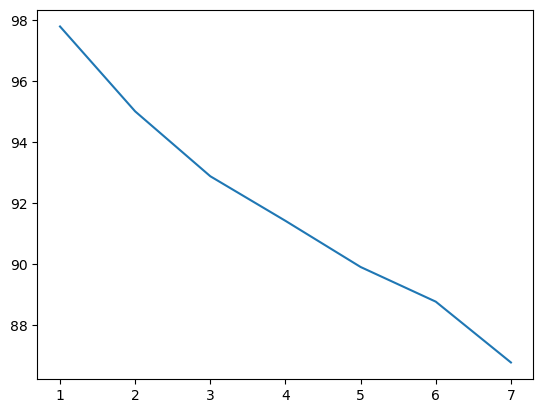

In [24]:
# Clustering K-Means
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
MAX_CLUSTERS = 8

for i in range(1, MAX_CLUSTERS):
  kmeans = KMeans(n_clusters = i, init="k-means++", max_iter = 500, random_state=2)
  kmeans.fit(X=X)
  wcss.append(kmeans.inertia_)


print(wcss)

plt.plot(range(1, MAX_CLUSTERS), wcss)
plt.xticks(range(1,MAX_CLUSTERS))
plt.show() # y axis = WCSS | x axis = k (# of clusters)


In [25]:
Tradeoff_Clusters = 6

kmeans = KMeans(n_clusters = Tradeoff_Clusters, init="k-means++", max_iter = 500, random_state=2)
predictions = kmeans.fit_predict(X=X)

Counter(predictions)

Counter({1: 45, 2: 39, 4: 24, 0: 21, 5: 5, 3: 4})

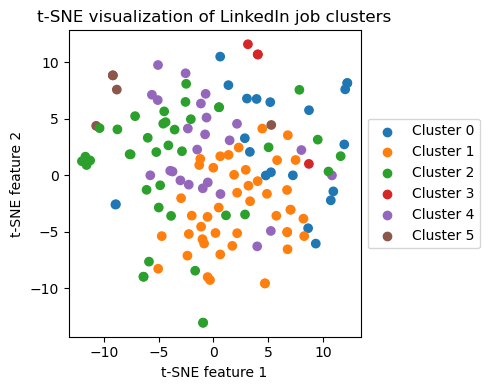

In [26]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
    '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78'
]

colors = colors[:Tradeoff_Clusters]

# Ensure we have enough colors for all clusters
color_map = np.array(colors)[predictions % len(colors)]

perplexity = min(30, len(all_jobs) - 1)

# Apply t-SNE
tsne = TSNE(n_components=2, init='random', perplexity=perplexity, random_state=40)
tsne_results = tsne.fit_transform(X)

# Visualize the results with custom colors
plt.figure(figsize=(5, 4))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=color_map)
plt.title('t-SNE visualization of LinkedIn job clusters')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')

# Add a legend
for i, color in enumerate(colors):
    plt.scatter([], [], c=color, label=f'Cluster {i}')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [29]:
import os


def make_out_dir():
    set_ir = set(predictions + 1)
    for i in set_ir:
        if os.path.exists(f'{base_output}/job{i}'):
            pass
        else:
            os.makedirs(f'{base_output}/job{i}')
    
    for idx, value in enumerate(list(predictions + 1)):
        with open(f'{base_output}/job{value}/{idx}.txt', 'w') as f:
            f.write(src[idx])
            print(f'Successfully saved {base_output}/job{value}/{idx}.txt !!!!!!')

make_out_dir()




Successfully saved out//job2/0.txt !!!!!!
Successfully saved out//job5/1.txt !!!!!!
Successfully saved out//job3/2.txt !!!!!!
Successfully saved out//job2/3.txt !!!!!!
Successfully saved out//job3/4.txt !!!!!!
Successfully saved out//job3/5.txt !!!!!!
Successfully saved out//job2/6.txt !!!!!!
Successfully saved out//job3/7.txt !!!!!!
Successfully saved out//job4/8.txt !!!!!!
Successfully saved out//job1/9.txt !!!!!!
Successfully saved out//job3/10.txt !!!!!!
Successfully saved out//job3/11.txt !!!!!!
Successfully saved out//job1/12.txt !!!!!!
Successfully saved out//job5/13.txt !!!!!!
Successfully saved out//job3/14.txt !!!!!!
Successfully saved out//job1/15.txt !!!!!!
Successfully saved out//job2/16.txt !!!!!!
Successfully saved out//job2/17.txt !!!!!!
Successfully saved out//job2/18.txt !!!!!!
Successfully saved out//job2/19.txt !!!!!!
Successfully saved out//job5/20.txt !!!!!!
Successfully saved out//job2/21.txt !!!!!!
Successfully saved out//job5/22.txt !!!!!!
Successfully saved ou